# INF8111 - Fouille de données


## TP1 ETE 2025 - Préparation de données




### Instructions de remise

#### Membres de l'équipe :
    - Elaa Mokhtari (2345005)
    - Marc Jodel Dumesle Alcindor (2000081)
    - Mariem Ben Jaber (2082688)

#### Numéro du groupe :
    - TP - Groupe 1
    
#### Livrable :

Vous devez soumettre ce notebook sur Moodle dans la boite de remise sous le nom TP1_1_2345005_2000081_2082688.ipynb.

**NB**: Tout travail en retard sera pénalisé d'une valeur de 10\% par jour de retard.


## Introduction et objectifs

### Importation des différents modules

In [1]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib
!pip install plotly
!pip install shap

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn import linear_model
import shap
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge


/Users/elaamokhtari/Downloads/TP1/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Lecture des données

In [3]:
df = pd.read_csv('data.csv')

Le but de ce notebook est d'effectuer le prétraitement du dataset [HousePricePrediction](https://docs.google.com/spreadsheets/d/1caaR9pT24GNmq3rDQpMiIMJrmiTGarbs/edit#gid=1150341366) qui pourra être par la suite être utilisé pour entraîner un modèle de prédiction de prix de maisons.

## Préparation des données

Plusieurs étapes sont nécessaires pour préparer un dataset pour la fouille des données
- **Nettoyage des données** :
    - Suppression des attributs inutiles
    - Gestion des valeurs manquantes
    - Gestion des valeurs aberrantes
- **Transformation des données** :
    - Encodage des données
    - Normalisation des données
- **Sélection des attributs** :
    - Suppression des attributs les plus fortement corrélés

<a id="exploration-des-donnees"></a>
## 1. Exploration des données (5 points)

Nous vous avons fourni le fichier *data.csv* avec l'exécution de la deuxième cellule. Il contient l'ensemble des données. Chaque ligne contient les données d'une vente. La description des attributs du dataset est la suivante:

| # | Feature Name | Description |
|---|--------------|-------------|
| 1 | Id           | Numéro de vente / To count the records. |
| 2 | MSSubClass   | Type de logement / Identifies the type of dwelling involved in the sale. |
| 3 | MSZoning     | Zonage / Identifies the general zoning classification of the sale. |
| 4 | LotArea      | Superficie du logement / Lot size in square feet. |
| 5 | LotConfig    | Configuration du logement / Configuration of the lot |
| 6 | BldgType     | Type de logement / Type of dwelling |
| 7 | OverallCond  | Etat général / Rates the overall condition of the house |
| 8 | YearBuilt    | Année de contruction / Original construction year |
| 9 | YearRemodAdd | Année de rénovation / Remodel date (same as construction date if no remodeling or additions). |
| 10| Exterior1st  | Type de revêtement extérieur / Exterior covering on house |
| 11| BsmtFinSF2   | Surface de vie / Type 2 finished square feet. |
| 12| TotalBsmtSF  | Surface totale de la base / Total square feet of basement area |
| 13| SalePrice    | Prix de vente à prédire / To be predicted |

On visualise le dataset pour avoir une idée de ce qu'il contient et des prétraitements à effectuer.

### 1.1 - Question 1 (2.5 points)

**Combien d'éléments contient le dataset ? Quelles sont les types des attributs du dataset ?**

Le jeu de données contient au total 13 colonnes et 2919 lignes (instances). Il existe au total 3 types de variables :
- Les variables de type `int64` telles que ID, MSSubClass, LotArea, OverallCond, YearBuilt, YearRemodAdd.
- Les variables de type `object` telles que MSZoning, LotConfig, BldgType, Exterior1st.
- Les variables de type `float64` telles que BsmtFinSF2, TotalBsmtSF et la variable cible SalePrice.


In [4]:
# Nombre d'éléments dans le dataset
print(f"Nombre d'éléments: {len(df)}")

# Types des attributs
print("\nTypes des attributs:")
print(df.dtypes)

# Aperçu des données
print("\nAperçu des données:")
df.head()

Nombre d'éléments: 2919

Types des attributs:
Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object

Aperçu des données:


,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


### 1.2 - Question 2 (2.5 points)

**Quelles sont les valeurs uniques des attributs de type `object` ?**

Les attributs de type `object` sont ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
- Valeurs uniques pour MSZoning (6 valeurs): ['RL' 'RM' 'C (all)' 'FV' 'RH' nan]
- Valeurs uniques pour LotConfig (5 valeurs): ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
- Valeurs uniques pour BldgType (5 valeurs): ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
- Valeurs uniques pour Exterior1st (16 valeurs): ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd' 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc' 'CBlock' nan]

In [5]:
# Identification des attributs de type 'object'
df_objects = df.select_dtypes(include=['object'])
object_columns = df_objects.columns.tolist()
print(f"Attributs de type 'object': {object_columns}")

# Valeurs uniques pour chaque attribut de type 'object'
for col in object_columns:
    unique_values = df[col].unique()
    print(f"\nValeurs uniques pour {col} ({len(unique_values)} valeurs):")
    print(unique_values)

Attributs de type 'object': ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

Valeurs uniques pour MSZoning (6 valeurs):
['RL' 'RM' 'C (all)' 'FV' 'RH' nan]

Valeurs uniques pour LotConfig (5 valeurs):
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

Valeurs uniques pour BldgType (5 valeurs):
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

Valeurs uniques pour Exterior1st (16 valeurs):
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock' nan]


<a id="nettoyage-des-donnees"></a>
## 2. Nettoyage des données (30 points)

<a id="suppression-des-attributs-inutiles"></a>
### 2.1 Suppression des attributs inutiles

### 2.1.1 - Question 3 (5 points)

**Pourquoi on peut supprimer l'attribut `Id` dans le cas de ce TP? Effectuez cette suppression.**

On peut supprimer l'attribut `Id` car:
- Il s'agit d'un simple identifiant séquentiel, ce qui signifie que chaque observation possède une valeur unique. Par conséquent, l’ensemble de test contiendrait des échantillons jamais vus lors de l'entraînement. Cette variable n’a donc aucun pouvoir prédictif, aucune valeur sémantique, ni aucune signification utile concernant les caractéristiques des maisons, ce qui la rend inutile pour la tâche de régression.

In [6]:
# Suppression de l'attribut 'Id'
df = df.drop('Id', axis=1)
df.head()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


<a id="gestion-des-valeurs-manquantes"></a>
### 2.2 Gestion des valeurs manquantes

Pour gérer les valeurs manquantes, plusieurs solutions s'offrent à nous :
- Remplacer par la valeur la plus fréquente (le mode)
- Remplacer par la valeur moyenne/médiane
- Suppression des lignes contenant des valeurs manquantes

Pour ce TP, nous utiliserons la dernière option car nous avons peu de valeurs manquantes.

#### 2.2.1 - Question 4 (2.5 points)

**Quels attributs contiennent des valeurs manquantes ?**

Seules les variables **MSZoning** avec quatre valeurs manquantes, **Exterior1st**, **BsmtFinSF2** et **TotalBsmtSF** avec une valeur manquante chacune, ainsi que **SalePrice** avec 1459 valeurs manquantes (les valeurs qui nous voulons predire )sont concernées.

In [7]:
# Identification des valeurs manquantes
valeurs_manquantes = df.isnull().sum()

# Afficher les colonnes avec des valeurs manquantes
print("Attributs contenant des valeurs manquantes:")
print(valeurs_manquantes[valeurs_manquantes > 0].to_string())

Attributs contenant des valeurs manquantes:
MSZoning          4
Exterior1st       1
BsmtFinSF2        1
TotalBsmtSF       1
SalePrice      1459


#### 2.2.2 - Question 5 (2.5 points)

On peut alors gérer les valeurs manquantes colonne par colonne. L'attribut `SalePrice` n'est pas pris en considération car les valeurs manquantes sont justement les valeurs que nous voulons prédire.

**Supprimer les lignes contenant les valeurs manquantes. Implémentez la fonction `delete_missing_values` qui retire ces données**.

In [8]:
def delete_missing_values(dataset):
    """
    This function deletes row whom a value is missing.

    :param dataset: ensemble des données
    :return:
      dataset traitée
    """
    colonnes_sans_SalePrice=dataset.columns.difference(['SalePrice'])
    dataset= dataset.dropna(subset=colonnes_sans_SalePrice)

    return dataset

    pass

In [9]:
df_dropped = delete_missing_values(df)

Les données manquantes pour la colonne `SalePrice` sont celles du dataset de test. On laisse donc ces valeurs manquantes car on veut appliquer le même prétraitement sur les données de test.

### 2.2.3 - Question 6 (10 points)

On veut néanmoins que les données d'entrainement suivent une distribution gaussienne.

**Implémenter le fonction `plot_hist`. Cette fonction doit permettre d'afficher la distribution des valeurs de l'attribut `SalePrice` ainsi que la loi normale de même moyenne et variance.**

In [10]:
def plot_hist(prices):
    """
    Affiche la distribution du prix de vente
    :param prices: ensemble des prix.
    """
    # Calcul des paramètres de la distribution normale
    mean = prices.mean()
    print('moyenne=', mean)
    std = prices.std()
    print('variance=', std)

    mu = np.mean(prices)
    sigma = np.std(prices, ddof=1)  # ddof=1 pour obtenir un estimateur non biaisé de l'écart-type

    # Création d'un histogramme pour les prix
    plt.hist(prices, bins=30, alpha=0.6, color='pink', edgecolor='#F06292', density=True, label='Histogramme de SalePrice')
    

    # Création de la distribution normale
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, sigma)

    # Tracer la distribution normale
    plt.plot(x, p, 'k', linewidth=2, label="Loi normale")

    title = "Distribution de SalePrice et loi normale associée"
    plt.title(title)
    plt.xlabel('SalePrice')
    plt.ylabel('Densité')
    plt.legend()

    plt.show()


moyenne= 180921.19589041095
variance= 79442.50288288662


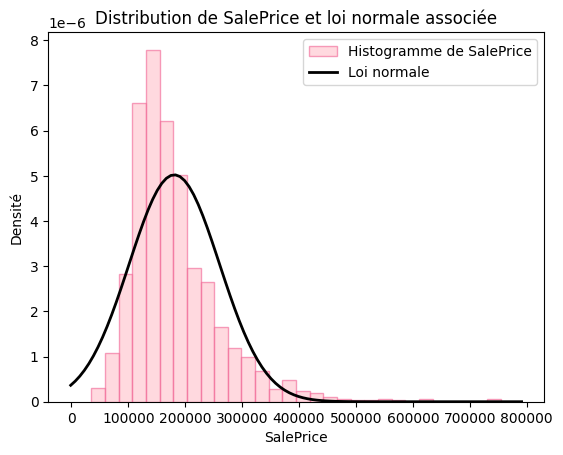

In [11]:
plot_hist(df_dropped['SalePrice'])

Vous devez obtenir une distribution des valeurs de `SalePrice` proches d'une distribution normale mais légèrement asymétrique. On peut alors appliquer une transformation logarithmique pour approcher d'une distribution normale symétrique.

**Effectuer cette transformation sur notre ensemble de données.**

In [12]:
# Application de la transformation logarithmique
df_dropped.loc[:, 'SalePrice'] = df_dropped['SalePrice'].map(lambda x: np.log1p(x) if not np.isnan(x) else x)


moyenne= 12.024057394918406
variance= 0.3994492733225068


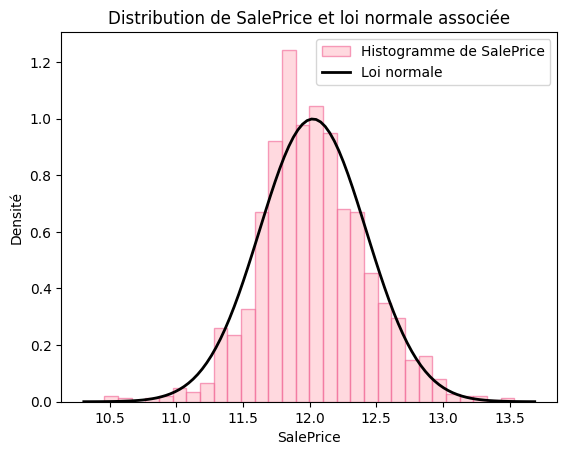

In [13]:
plot_hist(df_dropped['SalePrice'])

In [14]:
# Cette copie va servir plus tard pour la question 6 (IQR)
df_order1 = df_dropped.copy()

<a id="detection-des-valeurs-aberrantes"></a>
### 2.3 Détection des valeurs aberrantes

En pratique, la méthode de détection d'une valeur aberrante nécessite de se poser les questions suivantes:
- Quelles valeurs seraient incohérentes pour chaque colonne ?
- Quelles valeurs peuvent être problématiques pour l'utilisation de ces données ? Exemple: pour une régression linéaire, on préfère avoir des valeurs distribuées suivant une loi normale.

Avec ces éléments, on peut:
- Fixer des seuils de tolérance pour les valeurs aberrantes
- Utiliser des algorithmes de détection de valeurs aberrantes (ex: clustering, IRQ, [QTest](https://plotly.com/python/v3/outlier-test/), ...)

A noter que suivant les méthodes, les valeurs détectées comme aberrantes peuvent être différentes.

La méthode IRQ fait l'objet d'une question, en fin de ce notebook.

### 2.3.1 Question 7 (10 points)

Ici comme nous allons réaliser une régression linéaire, nous allons visuellement voir si certains points s'écartent largement de la droite de régression.

On sait que l'on veut effectuer une régression linéaire pour prédire `SalePrice`. On peut donc visualiser les valeurs de chaque attribut en fonction de `SalePrice` pour détecter la présence de valeurs aberrantes.

**Implémenter la fonction `plot_line`. Elle doit permettre de visualiser la relation entre un attribut donné et `SalePrice`.**

In [15]:
def plot_line(attr):
    """
    Affiche la relation entre attr et SalePrice
    :param attr: attribut à comparer à SalePrice
    """

    train_index = 1459
    new_df = pd.DataFrame({attr : df_dropped[attr], 'SalePrice' :  df_dropped['SalePrice']})
    new_df.sort_values(by  = attr)
    new_df = new_df.iloc[:train_index]

    m, b = np.polyfit(new_df[attr], new_df['SalePrice'], 1)  # m = pente, b = intercept

    plt.figure(figsize=(10, 5))

    plt.plot(new_df[attr], new_df['SalePrice'], marker='o',linestyle='', color='purple', label='Data points')
    plt.plot(new_df[attr], m*new_df[attr] + b, color='black')
    plt.title(f'Relation entre {attr} et SalePrice')
    plt.xlabel(attr)
    plt.ylabel('SalePrice')
    plt.grid(True)
    plt.show()

**Afficher les relations de tous les attributs avec `SalePrice`. Peut-on y déceler des valeurs aberrantes ?**

Observations sur les valeurs aberrantes:
- LotArea : On peut observer plusieurs points très éloignés de la tendance générale, notamment des terrains de grande superficie avec un prix qui ne suit pas la tendance croissante attendue. Certaines propriétés avec des superficies extrêmement grandes (valeurs à droite du graphique) semblent être des outliers.

- TotalBsmtSF : Quelques maisons avec des sous-sols très grands montrent des valeurs qui s'écartent significativement de la tendance générale.

- BsmtFinSF2 : La distribution est très particulière avec beaucoup de valeurs à 0 et quelques valeurs élevées qui apparaissent clairement comme des outliers.

- OverallCond : On peut observer quelques maisons dont l'état général ne correspond pas au prix attendu - par exemple, des maisons en très bon état avec un prix anormalement bas ou inversement.

- YearBuilt et YearRemodAdd : Certaines maisons très anciennes ou très récentes ont des prix qui s'écartent notablement de la tendance de leur groupe d'âge.

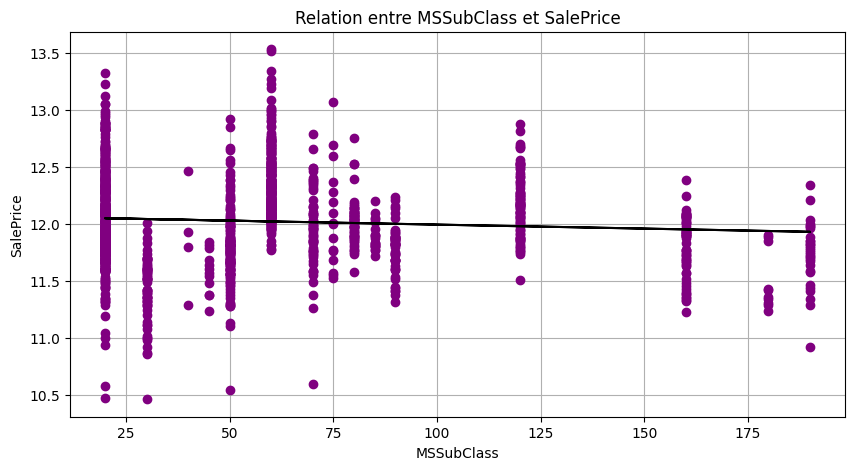

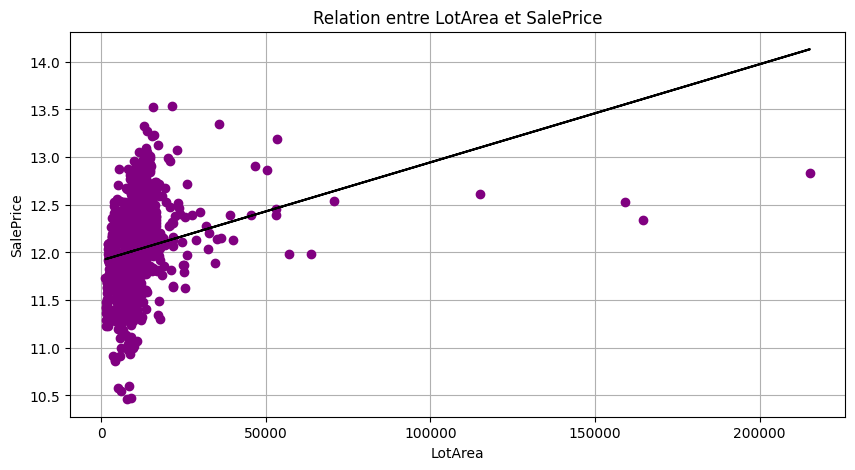

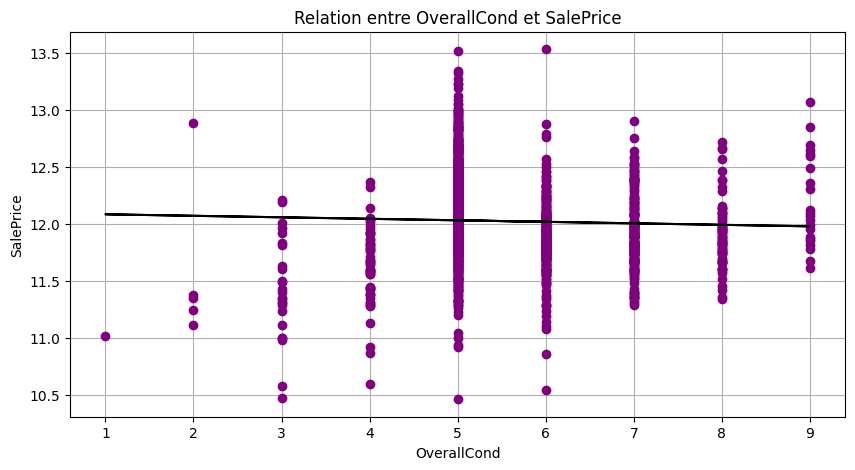

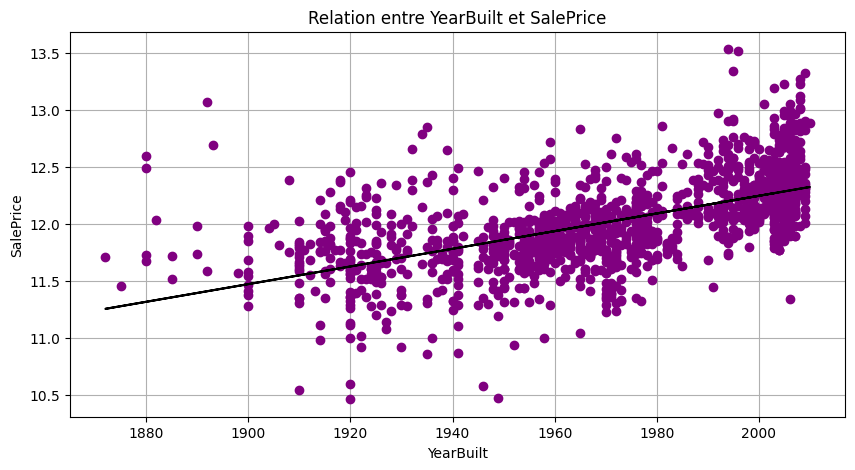

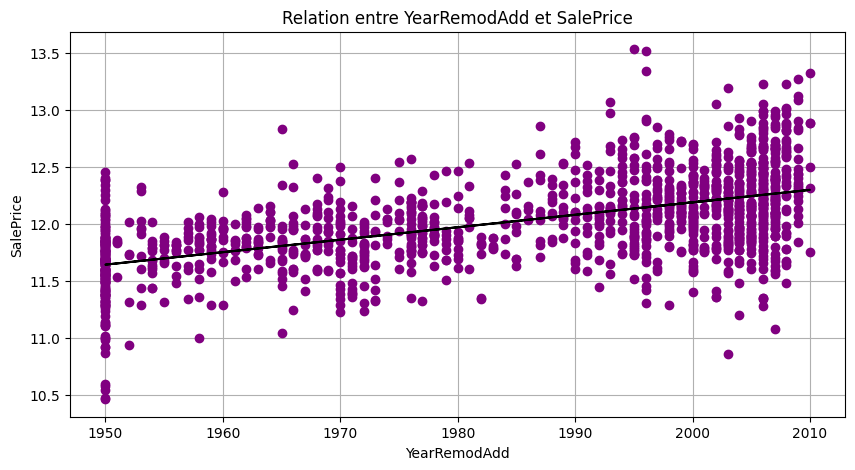

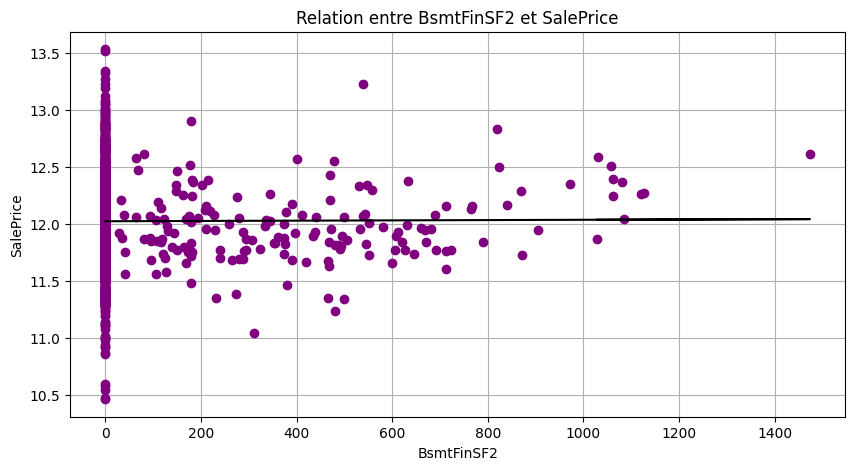

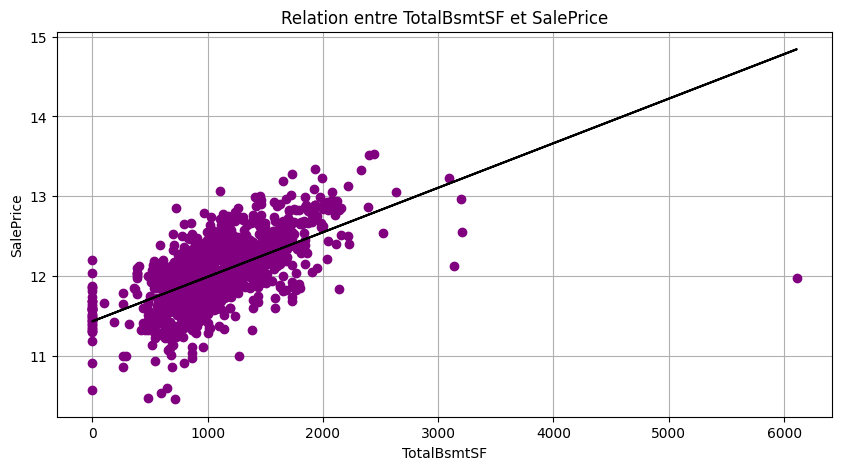

In [16]:
for attr in df_dropped.columns :
    if df_dropped[attr].dtypes  in ['int64' , 'float64']  and attr != 'SalePrice' :
        plot_line(attr)

**À ce stade, il s'agit uniquement de détecter la présence éventuelle de valeurs aberrantes dans les données.**
**Aucune action de traitement ou de remplacement n'est demandée pour le moment**

## 3. Transformation des données (10 points)

### 3.1 Encodage des attributs de type `object`

Les attributs de type `object` étant catégoriques (voire partie 1), on peut effectuer un `one hot encoding` de ces attributs. `Pandas` permet d'effectuer cela avec la fonction `get_dummies()`. Cela nous permettra d'obtenir un dataset contenant uniquement des attributs de type `int` ou `float`.


#### 3.1.1 Question 8 (5 points)

**Encodez les attributs de type `object` avec un `one hot encoding`**

In [17]:
object_variables_encoded = pd.get_dummies(df_dropped.loc[:, df_objects.columns], dtype=int)
# Drop original object columns
df_encoded = df_dropped.drop(df_objects.columns, axis=1)
# Combine encoded and remaining columns
df_encoded = pd.concat([object_variables_encoded, df_encoded], axis=1)
# Output
df_encoded


,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,...,Exterior1st_Wd Sdng,Exterior1st_WdShing,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,0,0,1,0,0,0,0,0,1,...,0,0,60,8450,5,2003,2003,0.0,856.0,12.247699
1,0,0,0,1,0,0,0,1,0,0,...,0,0,20,9600,8,1976,1976,0.0,1262.0,12.109016
2,0,0,0,1,0,0,0,0,0,1,...,0,0,60,11250,5,2001,2002,0.0,920.0,12.317171
3,0,0,0,1,0,1,0,0,0,0,...,1,0,70,9550,5,1915,1970,0.0,756.0,11.849405
4,0,0,0,1,0,0,0,1,0,0,...,0,0,60,14260,5,2000,2000,0.0,1145.0,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0,0,0,0,1,0,0,0,0,1,...,0,0,160,1936,7,1970,1970,0.0,546.0,NaN
2915,0,0,0,0,1,0,0,0,0,1,...,0,0,160,1894,5,1970,1970,0.0,546.0,NaN
2916,0,0,0,1,0,0,0,0,0,1,...,0,0,20,20000,7,1960,1996,0.0,1224.0,NaN
2917,0,0,0,1,0,0,0,0,0,1,...,0,0,85,10441,5,1992,1992,0.0,912.0,NaN


### 3.2 Normalisation des données

Pour faciliter l'entraînement du modèle, on peut normaliser les données. `sklearn` permet d'effectuer cela avec les fonctions suivantes :

*   `StandardScaler()` normalise les données en soustrayant la moyenne et en divisant par l'écart-type
*   `MinMaxScaler()` normalise les données en les ramenant entre 0 et 1.

Dans la suite de ce TP, nous utiliserons la fonction `StandardScaler()`.

In [18]:
# A utiliser dans la partie 5.2
mu_sale_price = df["SalePrice"].mean()
sigma_sale_price = df["SalePrice"].std()

#### 3.2.1 Question 9 (5 points)

**Implémenter la fonction `normalize`. Elle doit réaliser la normalisation des données.**

In [19]:
from sklearn import preprocessing
import pandas as pd

def normalize(dataset):
    """
    Normalise les données du dataset.

    :param dataset: ensemble des données
    :return:
      dataset traitée
    """
    # Identify numeric and categorical columns
    numeric_columns = dataset.loc[:, dataset.nunique() > 2].columns.tolist()
    categorical_columns = dataset.loc[:, dataset.nunique() <= 2].columns.tolist()

    print("- Colonnes numériques :\n", numeric_columns)
    print("- Colonnes catégorielles :\n", categorical_columns)

    # Split data
    categorical_values = dataset[categorical_columns]
    numeric_values = dataset[numeric_columns]
    index_ = dataset.index.tolist()

    # Normalize numeric features
    scl = preprocessing.StandardScaler()
    normalized_dataset = scl.fit_transform(numeric_values)

    # Reassemble DataFrame
    normalized_dataset = pd.DataFrame(normalized_dataset, columns=numeric_columns, index=index_)
    new_dataframe = pd.concat([categorical_values, normalized_dataset], axis=1)

    return new_dataframe


In [20]:
df_normalized = normalize(df_encoded)

- Colonnes numériques :
 ['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice']
- Colonnes catégorielles :
 ['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing']


## 4. Sélection des attributs corrélées (15 points)

### 4.1 Suppression des attributs corrélées

Pour améliorer la qualité de la prédiction, nous devons prendre en compte la corrélation entre attributs. L'objectif est donc de supprimer les attributs les plus fortement corrélées entre eux.

Pour ce faire, vous disposez des fonctions suivantes

* `corr()` de `Pandas` qui calcule la matrice de corrélation
* `heatmap()` de `seaborn` qui permet de visualiser la matrice de corrélation


#### 4.1.1 Question 10 (10 points)

**Implémenter la fonction `display_corr_matrix`. Elle doit permettre d'afficher la matrice de corrélation entre les différents attributs de nos données après normalisation des données.**

In [21]:
def display_corr_matrix(dataset):
    """
    Créer et affiche la matrice de corrélation des attributs liés au dataset.

    :param dataset: ensemble des données
    """
    plt.figure(figsize=(30, 15))  # Taille de la figure
    correlations = dataset.corr().apply(np.abs)
    sns.set(font_scale=0.6)
    sns.heatmap(correlations, annot=True, fmt=".2f", cmap="OrRd", cbar=True, square=True, linewidths=0.5)
    plt.title("Matrice de Corrélation des Attributs Normalisés")
    plt.show()


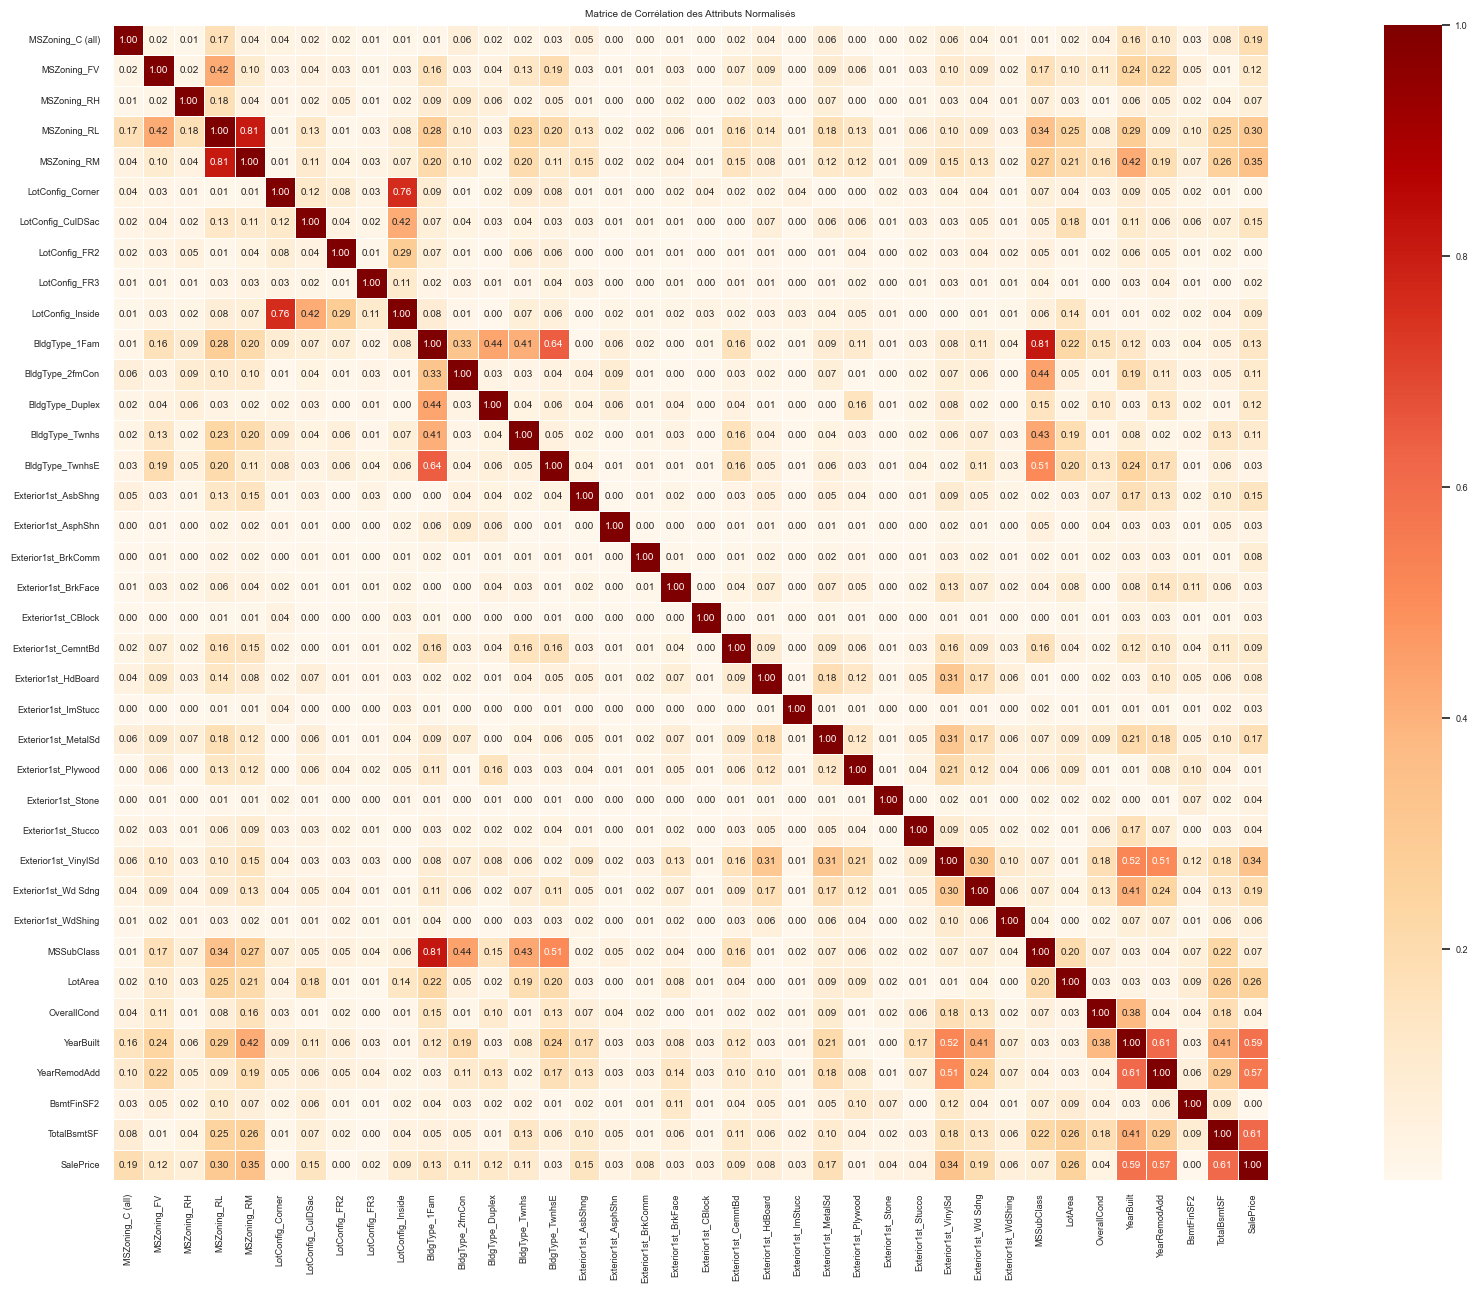

In [22]:
display_corr_matrix(df_normalized)

#### 4.1.2 Question 11 (5 points)

On peut alors choisir de supprimer les attributs qui sont fortement corrélées entre eux en définissant un seuil. Fixons ce seuil à 0.7.

**Quels sont les attributs fortement correlés selon le critère ci-dessus ? Supprimez ces attributs et affichez la nouvelle matrice de corrélation.**

Les paires d'attributs fortement corrélés sont :
- BldgType_1Fam, MSSubClass : 0.81
- MSZoning_RL, MSZoning_RM : 0.81
- LotConfig_Corner, LotConfig_Inside : 0.76


Les attributs fortement corrélés (> 0.7) (triés décroissant) :
BldgType_1Fam, MSSubClass : 0.81
MSZoning_RL, MSZoning_RM : 0.81
LotConfig_Corner, LotConfig_Inside : 0.76


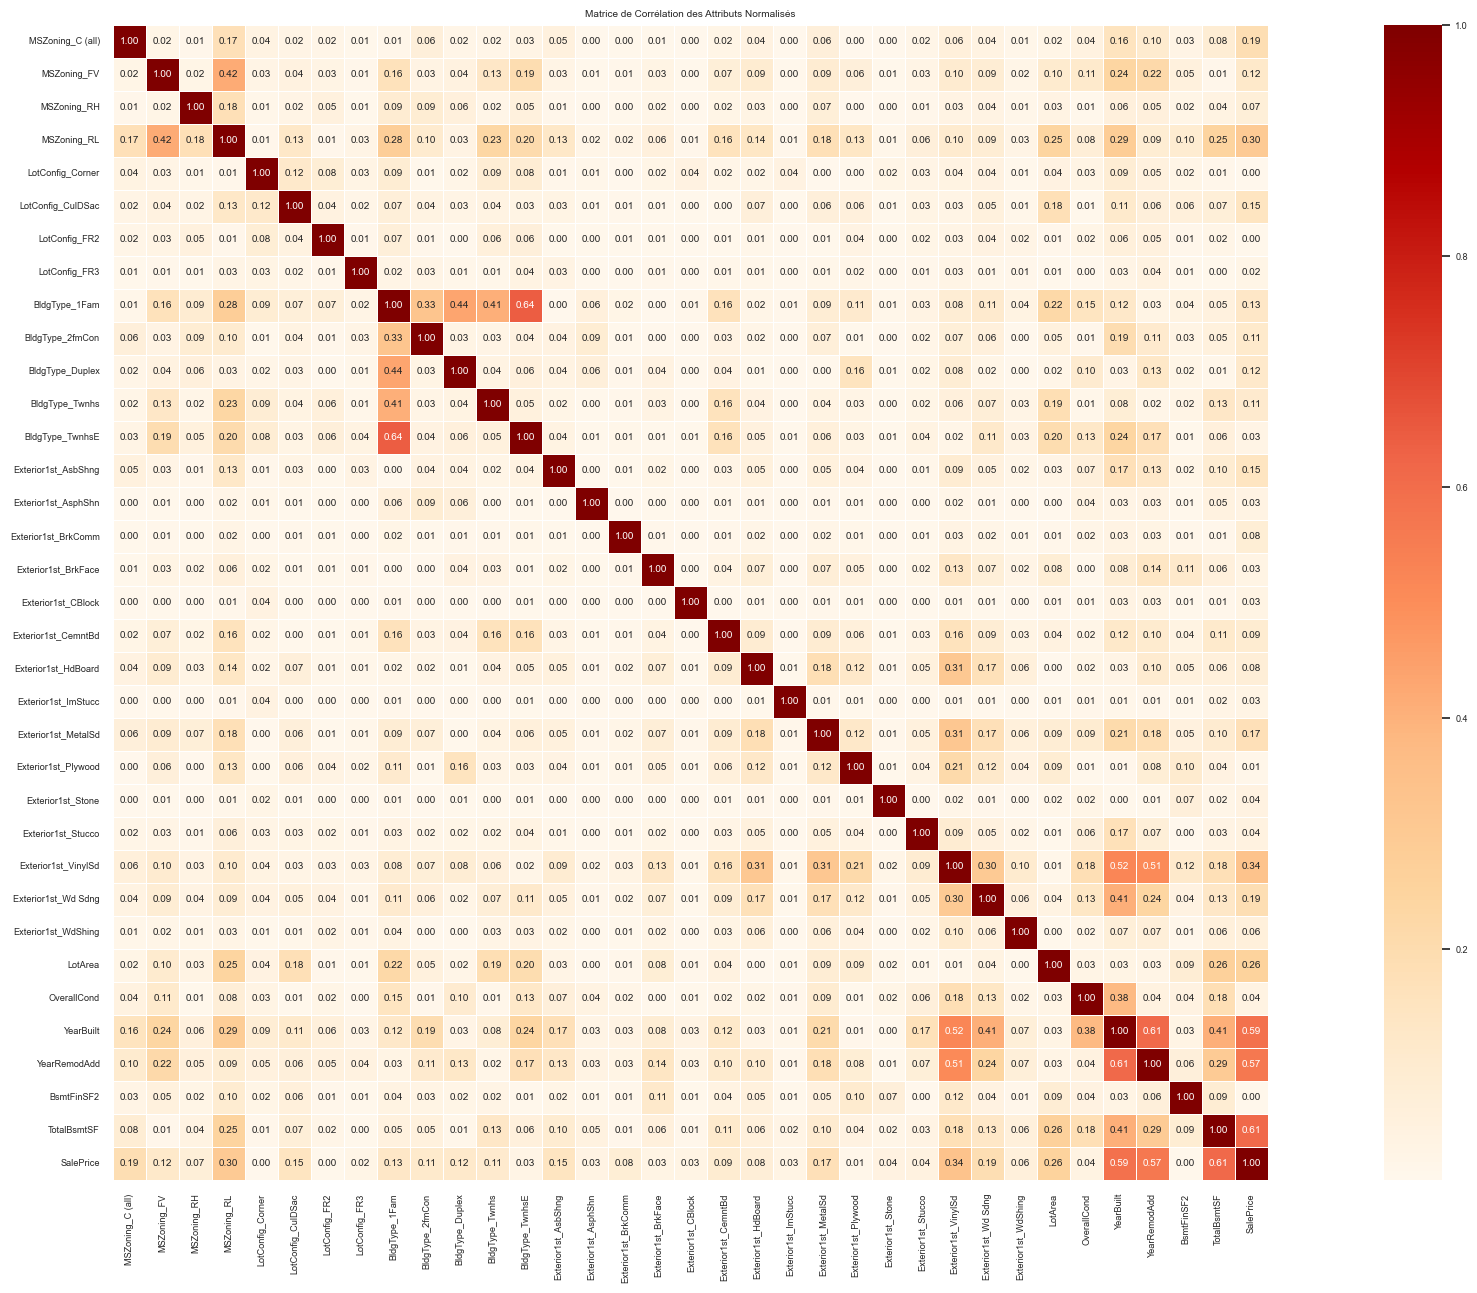

In [23]:
# Step 1: Find and sort highly correlated feature pairs
threshold = 0.7
corr = df_normalized.corr().abs()
high_corr_pairs = sorted(
    [(c1, c2, corr.loc[c1, c2]) for i, c1 in enumerate(corr.columns)
     for j, c2 in enumerate(corr.columns) if i < j and corr.loc[c1, c2] > threshold],
    key=lambda x: x[2], reverse=True
)

# Step 2: Print correlated pairs
print("Les attributs fortement corrélés (> 0.7) (triés décroissant) :")
for col1, col2, value in high_corr_pairs:
    print(f"{col1}, {col2} : {value:.2f}")

# Step 3: Drop manually chosen features & show updated matrix
to_drop = ["MSZoning_RM", "LotConfig_Inside", "MSSubClass"]
df_feature_supression = df_normalized.drop(columns=to_drop)
display_corr_matrix(df_feature_supression)


## 5. Entrainement d'un modèle de régression linéaire (30 points)

### 5.1 Rappel du concept

La régression linéaire consiste à trouver une fonction affine qui minimise la somme des carrés des erreurs. La fonction affine est définie par la formule suivante :
$$ f(x) = \beta_0 + \beta_1^T x $$
Nous tentons de trouver les paramètres $\beta_0$ et $\beta_1$ qui minimisent $\sum_{i=1}^n (f(x_i) - y_i)^2=||y-X\beta||^2$ où $X$ est la matrice des données fournies au modèle et $y$ le vecteur des `SalePrice`.

On veut trouver le minimum de cette fonction. On va utiliser `RidgeRegression` de `sklearn` pour trouver les paramètres $\beta_0$ et $\beta_1$. Ce module utilise la méthode des moindres carrés (`numpy.linalg.lstsq`) pour trouver les paramètres $\beta_0$ et $\beta_1$.

### 5.2 Application

#### 5.2.1 Question 12 (5 points)

Après avoir effectué le prétraitement, on peut commencer par séparer les données en un ensemble d'entraînement et un ensemble de test. Pour cela, les 1460 premières lignes contiennent les données d'entrainement. On peut ainsi séparer les données en deux ensembles.

**Compléter la structure suivante afin de diviser les données en deux sous-ensembles.**

In [24]:
data_train = {"x": df_feature_supression.iloc[0:1460].drop("SalePrice", axis= 1) ,
              "y": df_feature_supression.iloc[0:1460]["SalePrice"],
              "df": df_feature_supression.iloc[0:1460]}
data_pred = {"x": df_feature_supression.iloc[1461:].drop("SalePrice", axis= 1) ,
             "df": df_feature_supression.iloc[1460:]}

#### 5.2.2 Question 13 (7.5 points)

Une fois cette séparation faite, on peut utiliser `RidgeRegression` pour effectuer la régression linéaire avec pénalisation de la norme L2.

**Compléter la fonction `ridge_regression`. Elle doit implémenter l'ensemble de la régression.**

*Pour cette question, vous devez retourner les coefficients de la regression linéaire. De plus, cette fonction doit modifier le paramètre `data_pred` en y ajoutant les valeurs prédites.*

**Remarques**:
- La fonction doit retourner un dictionnaire dont les clés sont les noms des attributs et les valeurs, les coefficients correspondants.
- Dans `data_pred`, ajoutez deux colonnes : une première contenant les prédictions (sortie du modèle), et une deuxième avec les prédictions remises à l’échelle originale des prix, en inversant la standardisation et la transformation logarithmique.

In [25]:
def ridge_regression(data_train, data_pred):
    """
    Réaliser la prédiction selon la régression de Rigde.

    :param data_train: données d'entrainement
    :param data_pred: données de prédiction
    :return:
      coefficients de la régression
    """
    rgr = linear_model.Ridge()
    rgr.fit(data_train["x"], data_train["y"])
    data_pred["y"] = rgr.predict(data_pred["x"])
    return rgr.coef_

In [26]:
reg = ridge_regression(data_train, data_pred)
data_pred["y"]

array([0.03655459, 0.35406177, 0.43299567, ..., 0.44888878, 0.05138553,
       0.1456489 ], shape=(1452,))

#### 5.2.3 Question 14 (5 points)

**À l’aide d’un histogramme, comparez la distribution des prix prédits à celle des données d’entraînement, en vous assurant que les deux sont représentées à l’échelle originale des prix (c’est-à-dire sans transformation logarithmique ni standardisation). Commentez brièvement.**

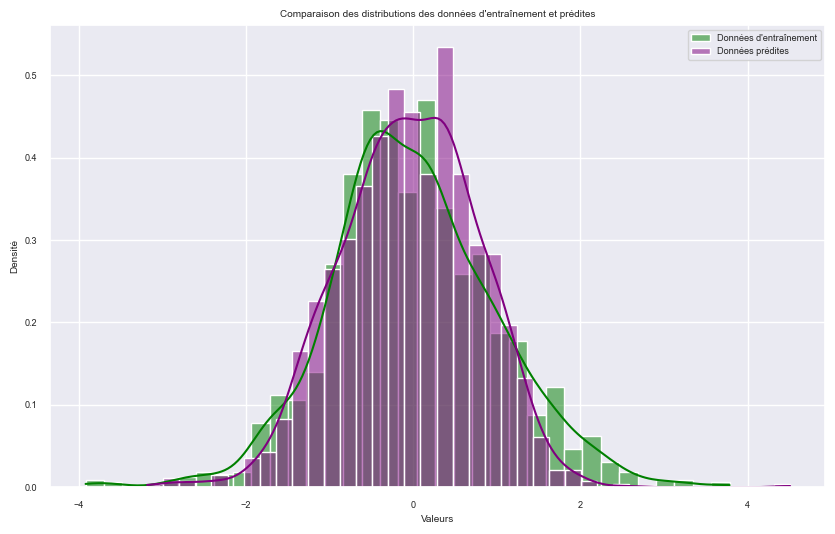

In [27]:

plt.figure(figsize=(10, 6))
sns.histplot(data_train['y'], color="green", label="Données d'entraînement", kde=True ,  stat="density")
sns.histplot(data_pred["y"], color="purple", label="Données prédites", kde=True, stat="density")
plt.title("Comparaison des distributions des données d'entraînement et prédites")
plt.xlabel("Valeurs")
plt.ylabel("Densité")
plt.legend()
plt.show()

En examinant l'histogramme des distributions des prix d'entraînement et prédits, on peut observer plusieurs caractéristiques importantes :

Les deux distributions présentent une forme similaire, ce qui indique que le modèle de régression Ridge a capturé la tendance générale des données.,

La distribution des prix prédits (en violet) est plus concentrée autour de la moyenne que celle des prix d'entraînement (en vert). Cela illustre une tendance classique des modèles de régression linéaire à "régresser vers la moyenne", produisant des prédictions moins extrêmes que les valeurs réelles.,

Les valeurs extrêmes sont moins représentées dans les prédictions. Ceci est particulièrement visible aux extrémités droites de la distribution, où le modèle sous-estime les prix des maisons les plus coûteuses.,

Cette comparaison suggère que notre modèle performe raisonnablement bien pour les maisons à prix moyen, mais pourrait être moins précis pour les propriétés atypiques.

### 5.3. Sélection des attributs importants
#### 5.3.1 Question 15 (5 points)

Une fois la prédiction obtenue, on peut maintenant mesurer l'importance de chaque attribut dans la prédicition en traçant les coefficients de la régression linéaire.

**Quels sont les dix attributs ayant le plus d'impact dans la prédiction ?**


Top 10 attributs par importance SHAP :
MSZoning_C (all)      -0.901354
Exterior1st_BrkComm   -0.762876
Exterior1st_Stone      0.457622
MSZoning_FV            0.372337
TotalBsmtSF            0.365348
YearBuilt              0.343201
Exterior1st_BrkFace    0.329537
BldgType_Twnhs        -0.256274
YearRemodAdd           0.229820
BldgType_2fmCon        0.221405
dtype: float64


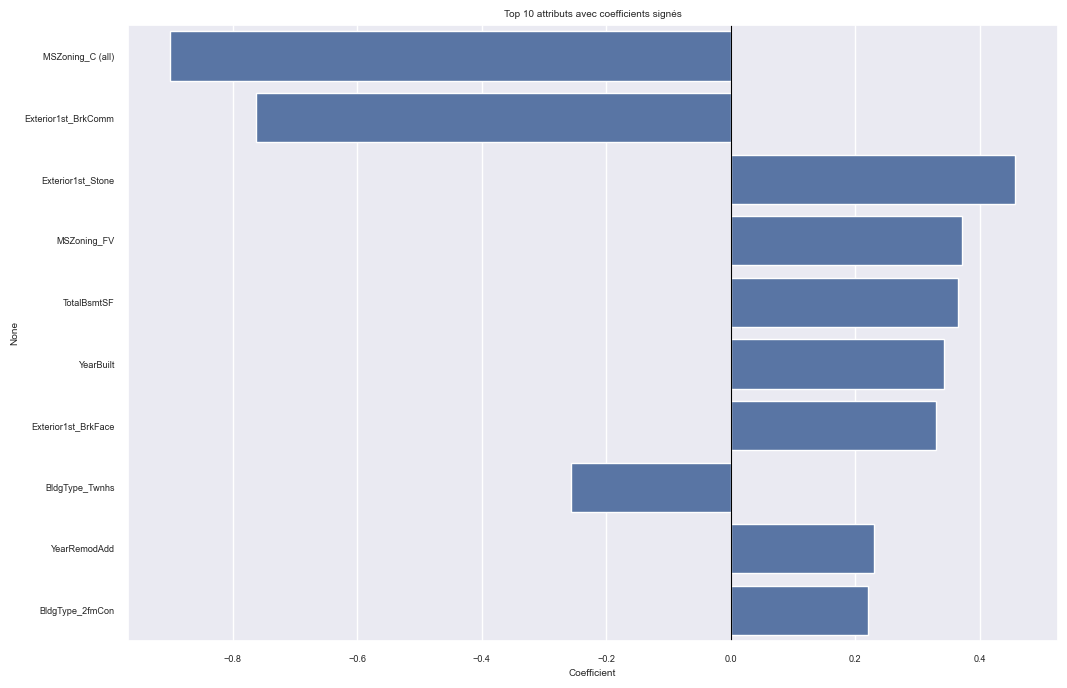

In [28]:
# Créer une Series avec les coefficients signés indexés par noms des colonnes
coef_series = pd.Series(reg, index=data_train["x"].columns)

# Trier par importance (valeur absolue décroissante)
coef_series_sorted = coef_series.reindex(coef_series.abs().sort_values(ascending=False).index)

# Sélectionner top 10
top_coef = coef_series_sorted.head(10)

print("Top 10 attributs par importance SHAP :")
print(top_coef)


# Afficher le graphique avec les signes
plt.figure(figsize=(12, 8))
sns.barplot(x=top_coef.values, y=top_coef.index,) 
plt.xlabel("Coefficient")
plt.title("Top 10 attributs avec coefficients signés")
plt.axvline(0, color='black', linewidth=0.8)
plt.show()

#### 5.3.2 Question 16 (7.5 points)

Cette dernière méthode n'est pas nécessairement une bonne mesure de l'importance d'un attribut. On peut utiliser la méthode SHAP (SHapley Additive exPlanations) pour effectuer la sélection des attributs.

**Les dix attributs ayant le plus d'impact dans la prédiction pour cette mesure sont-ils les mêmes que ceux de la question précédente ? Donnez une interprétation comparative de ces deux résultats**


In [29]:
# Entraîner le modèle Ridge
model = Ridge()
model.fit(data_train["x"], data_train["y"])

# Calculer les valeurs SHAP
explainer = shap.Explainer(model, data_train["x"])
shap_values = explainer.shap_values(data_train["x"])

# Moyenne absolue des valeurs SHAP pour chaque attribut
shap_importance = np.abs(shap_values).mean(axis=0)

# Obtenir les indices des 10 attributs les plus importants (ordre croissant)
top_10_shap_indices = np.argsort(shap_importance)[-10:][::-1]  # descending

print("Les dix attributs ayant le plus d'impact selon SHAP, avec leurs coefficients Ridge :\n")
for idx in top_10_shap_indices:
    feature_name = data_train["x"].columns[idx]
    coef_value = model.coef_[idx]
    print(f"{feature_name}: {coef_value:.4f}")



Les dix attributs ayant le plus d'impact selon SHAP, avec leurs coefficients Ridge :

YearBuilt: 0.3432
TotalBsmtSF: 0.3653
YearRemodAdd: 0.2298
OverallCond: 0.1236
MSZoning_RL: 0.2070
BldgType_1Fam: 0.1954
Exterior1st_HdBoard: -0.1780
LotArea: 0.0859
MSZoning_FV: 0.3723
LotConfig_Corner: 0.0618


Les deux méthodes donnent des résultats différents car elles mesurent l’importance des variables de manière distincte.

Quatre variables — MSZoning_FV, YearBuilt, TotalBsmtSF, YearRemodAdd — apparaissent dans les deux top 10, ce qui montre qu’elles ont un impact à la fois global (coefficients Ridge) et local (valeurs SHAP) sur les prédictions.

Les autres différences s’expliquent par :

- Les coefficients Ridge mettent en avant des variables catégorielles one-hot avec un fort effet moyen global.

- Les valeurs SHAP révèlent des variables ayant un impact local significatif, même si leurs coefficients sont faibles.

Les deux approches sont complémentaires pour bien comprendre l’influence des variables dans le modèle.

## 6. Méthode des écarts interquartiles ou IRQ (10 points)

On peut également détecter les valeurs aberrantes en affichant un boxplot de chaque colonne. On considère les valeurs comme aberrantes si elles sont situées en dehors de l'intervalle [Q1 - α * IQR, Q3 + α * IQR] où
* Q1 et Q3 sont les quantiles 25% et 75%,
* IQR l'intervalle interquartile (Q3 - Q1)
* α le facteur d'ajustement.

Pour cette question, on exclut `SalePrice` car les seules valeurs manquantes de cet attribut sont celles du dataset de test.

**Important :** Pour cette question, utilisez le jeux de données `df_order1` copié vers la fin de la section 2.

### 6.1 Question 17 (5 points)

Testez plusieurs valeurs du facteur d'ajustement α dans l'intervalle [1.5, 5] avec un pas de 0.5.
Pour chaque valeur de α :
- Calculez les bornes de détection des valeurs aberrantes (fences) pour chaque attribut numérique.
- Déterminez le nombre de valeurs aberrantes détectées pour chaque attribut.
- Affichez les résultats dans un `DataFrame`, où les lignes correspondent aux différentes valeurs de α et les colonnes correspondent aux attributs numériques.

**Remarque :** Vous pouvez utiliser la fonction `percentile` de `numpy` pour calculer les quantiles.

In [30]:
# Get numeric columns excluding 'SalePrice'
numeric_cols = df_order1.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'SalePrice' in numeric_cols:
    numeric_cols.remove('SalePrice')

# Initialize a DataFrame to store results
alpha_values = np.arange(1.5, 5.1, 0.5)
outliers_df = pd.DataFrame(index=alpha_values, columns=numeric_cols)
outliers_df.index.name = 'Alpha'

# Calculate outliers for each alpha value and each numeric column
for alpha in alpha_values:
    for col in numeric_cols:
        # Calculate quartiles and IQR
        q1 = np.percentile(df_order1[col].dropna(), 25)
        q3 = np.percentile(df_order1[col].dropna(), 75)
        iqr = q3 - q1

        # Calculate fences
        lower_fence = q1 - alpha * iqr
        upper_fence = q3 + alpha * iqr

        # Count outliers
        outliers = df_order1[(df_order1[col] < lower_fence) | (df_order1[col] > upper_fence)][col]
        outliers_df.loc[alpha, col] = len(outliers)

# Display the results
print("Number of outliers detected for each alpha value:")
display(outliers_df)


Number of outliers detected for each alpha value:


,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF
Alpha,,,,,,,
1.5,207,125,250,9,0,347,119
2.0,78,92,57,0,0,347,22
2.5,0,67,57,0,0,347,10
3.0,0,51,6,0,0,347,7
3.5,0,41,6,0,0,347,6
4.0,0,35,0,0,0,347,2
4.5,0,34,0,0,0,347,2
5.0,0,31,0,0,0,347,2


Visualisez les résultats dans une seule figure:
- L’axe X représente les valeurs de α.
- L’axe Y représente le nombre de valeurs aberrantes.
- Chaque courbe correspond à un attribut numérique, illustrant l’évolution du nombre de valeurs aberrantes en fonction de α.

Quelle valeur de α vous semble le mieux adaptée? Justifiez votre réponse.

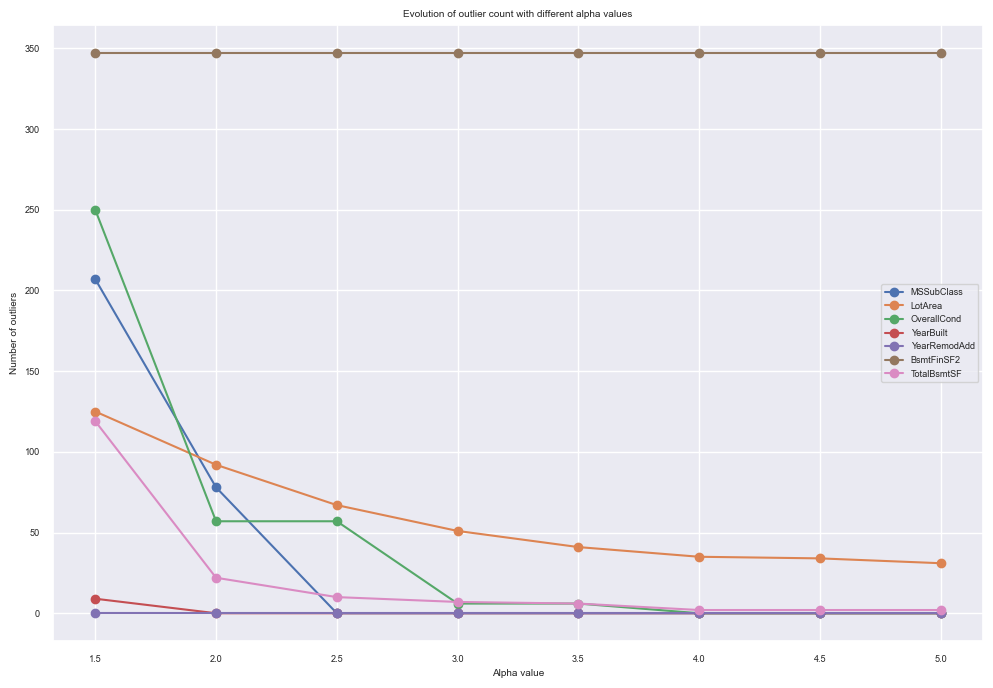

In [31]:
# Visualize the results
plt.figure(figsize=(12, 8))
for col in numeric_cols:
    plt.plot(outliers_df.index, outliers_df[col], marker='o', label=col)

plt.xlabel('Alpha value')
plt.ylabel('Number of outliers')
plt.title('Evolution of outlier count with different alpha values')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(alpha_values)
plt.show()

Une valeur de α = 3.0 semble la plus appropriée pour plusieurs raisons:

- Les valeurs inférieures (1.5-2.0) identifient un grand nombre de points comme aberrants, ce qui risque d'éliminer des données légitimes
- Les valeurs supérieures (4.0-5.0) sont trop permissives et pourraient manquer des anomalies réelles
- La visualisation montre que la diminution du nombre d'outliers devient moins prononcée après α = 3.0. Cela représente un "point de coude" où l'augmentation de α n'apporte plus de bénéfice significatif.
- Avec α = 3.0, on observe généralement un équilibre entre la préservation des données et l'élimination des valeurs vraiment extrêmes
Pour notre jeu de données immobilier, cela permettra d'éliminer les propriétés aux caractéristiques exceptionnelles tout en conservant la diversité naturelle du marché

### 6.2 Question 18 (5 points)

**On  fixe le facteur d'ajustement α à `3` pour tous les attributs.**

Pour chaque attribut numérique, tracez un boxplot. Ajoutez également deux lignes horizontales représentant les bornes inférieure et supérieure de l’intervalle [Q1 - α * IQR, Q3 + α * IQR].

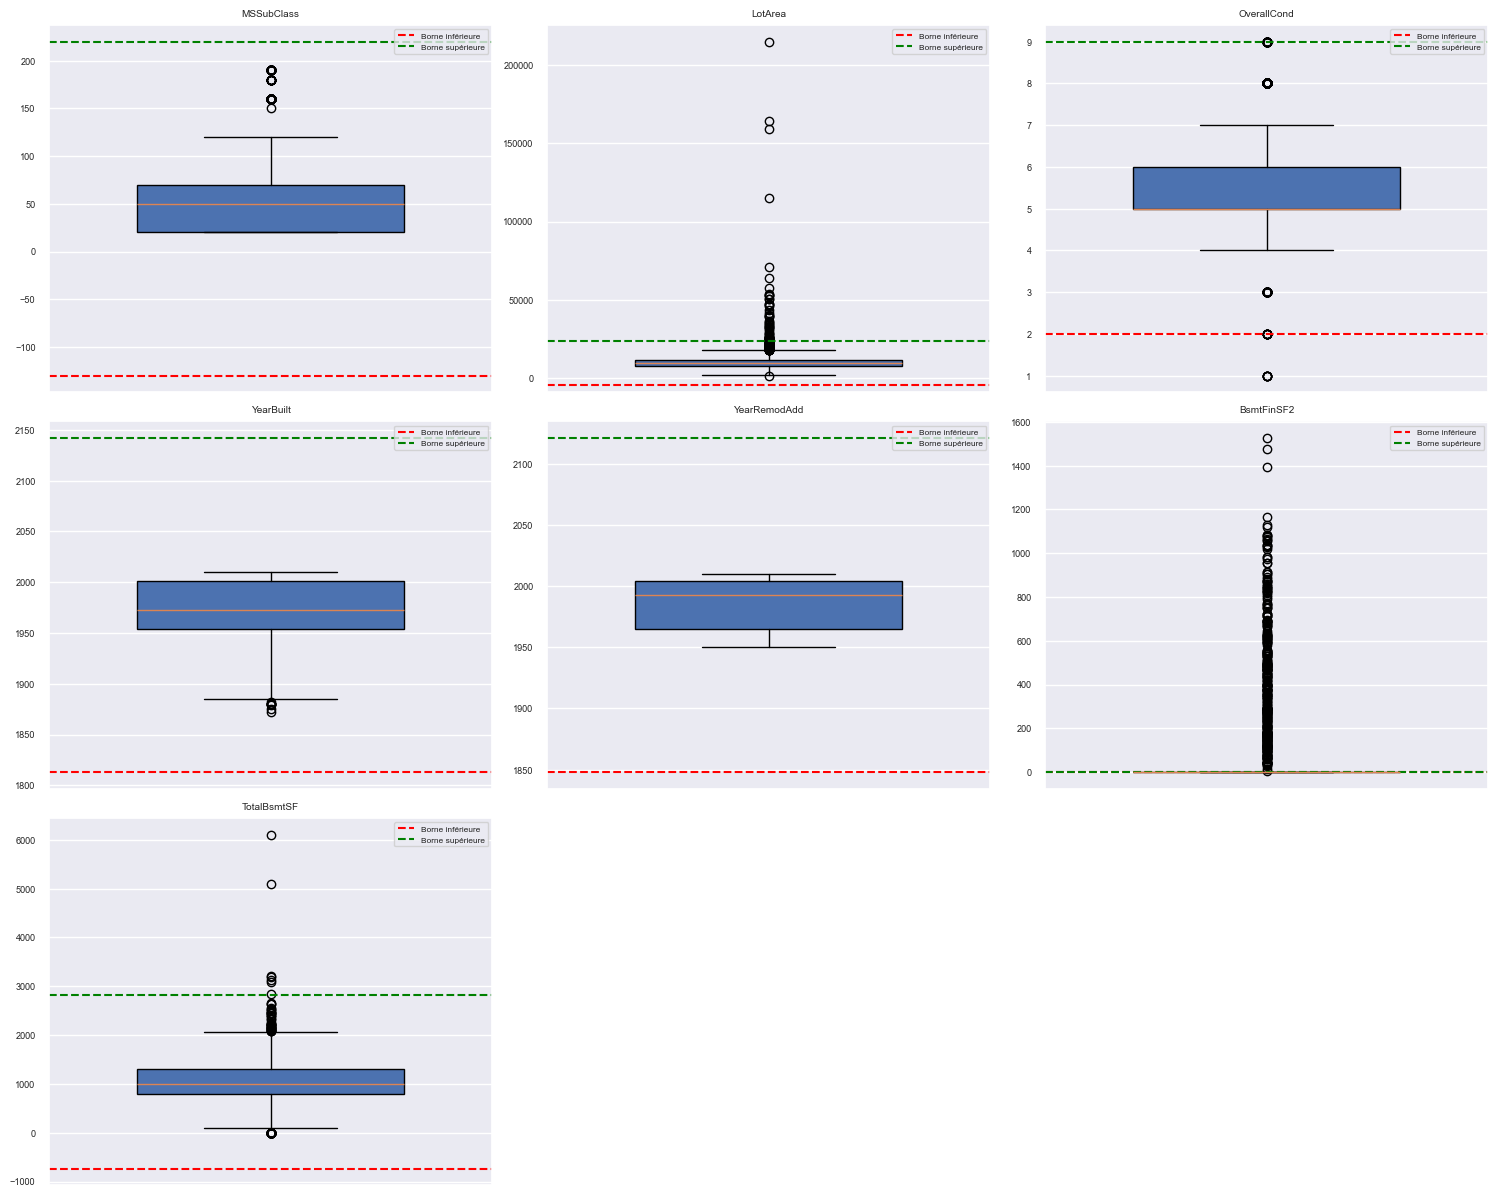

In [32]:
#TODO

import matplotlib.pyplot as plt
import numpy as np
alpha = 3

numeric_cols = df_order1.select_dtypes(include=[np.number]).columns.drop('SalePrice')

n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))
plt.figure(figsize=(5 * n_cols, 4 * n_rows))

# Pour chaque attribut, tracer un boxplot + bornes
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    data = df_order1[col].dropna()

    # Calcul des quantiles et des bornes
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_fence = Q1 - alpha * IQR
    upper_fence = Q3 + alpha * IQR

    plt.boxplot(data, vert=True, patch_artist=True, widths=0.6)
    plt.axhline(y=lower_fence, color='red', linestyle='--', label='Borne inférieure')
    plt.axhline(y=upper_fence, color='green', linestyle='--', label='Borne supérieure')

    plt.title(col)
    plt.xticks([])
    plt.legend(loc='upper right', fontsize='small')

plt.tight_layout()
plt.show()


Pour chaque attribut numérique (à l'exception de `BsmtFinSF2`), remplacez les valeurs aberrantes détectées avec α=3 par la `valeur médiane` de la colonne. Pourquoi ce remplacement n’est pas approprié pour l’attribut `BsmtFinSF2` ?

In [33]:
# replace outliers with median values (except for BsmtFinSF2)
df_cleaned = df_order1.copy()

for col in numeric_cols:
    if col != 'BsmtFinSF2':
        # Calculate quartiles and fences
        q1 = np.percentile(df_cleaned[col].dropna(), 25)
        q3 = np.percentile(df_cleaned[col].dropna(), 75)
        iqr = q3 - q1

        lower_fence = q1 - alpha * iqr
        upper_fence = q3 + alpha * iqr

        # Get median value
        median_value = df_cleaned[col].median()

        # Identify outliers
        outliers = (df_cleaned[col] < lower_fence) | (df_cleaned[col] > upper_fence)
        outlier_count = outliers.sum()

        # Replace outliers with median
        df_cleaned.loc[outliers, col] = median_value

        print(f"Column {col}: {outlier_count} outliers replaced with median {median_value:.2f}")

Column MSSubClass: 0 outliers replaced with median 50.00
Column LotArea: 51 outliers replaced with median 9450.00
Column OverallCond: 6 outliers replaced with median 5.00
Column YearBuilt: 0 outliers replaced with median 1973.00
Column YearRemodAdd: 0 outliers replaced with median 1993.00
Column TotalBsmtSF: 7 outliers replaced with median 990.00


L’attribut BsmtFinSF2 est très particulier car il contient majoritairement des valeurs nulles (0). Cela correspond à des maisons sans deuxième sous-sol aménagé, ce qui est parfaitement normal.

Les quelques valeurs supérieures à 0 sont rares, mais elles représentent des cas réels et spécifiques. La méthode IQR, en se basant sur la dispersion des données, considère ces cas comme des outliers, car ils sont éloignés de la médiane (qui est 0).

Remplacer ces valeurs par la médiane reviendrait à perdre des informations précieuses, voire à invalider des cas corrects. C’est pourquoi il ne faut pas appliquer cette méthode de remplacement à BsmtFinSF2.